In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [3]:
# a function that creates data


def createSomeData(nPerClust):

    A = [1, 1]
    B = [5, 1]
    C = [4, 4]

    # generate data
    a = [A[0] + np.random.randn(nPerClust), A[1] + np.random.randn(nPerClust)]
    b = [B[0] + np.random.randn(nPerClust), B[1] + np.random.randn(nPerClust)]
    c = [C[0] + np.random.randn(nPerClust), C[1] + np.random.randn(nPerClust)]

    # true labels
    labels_np = np.hstack(
        (np.zeros((nPerClust)), np.ones((nPerClust)), 1 + np.ones((nPerClust)))
    )

    # concatanate into a matrix, then convert to a pytorch tensor
    data_np = np.hstack((a, b, c)).T

    # NEW: put all outputs into a dictionary
    output = {}
    output["data"] = torch.tensor(data_np).float()
    output["labels"] = torch.tensor(
        labels_np
    ).long()  # note: "long" format (integers) for labels

    # use scikitlearn to split the data
    train_data, test_data, train_labels, test_labels = train_test_split(
        output["data"], output["labels"], train_size=0.9
    )

    # then convert them into PyTorch Datasets (note: already converted to tensors)
    train_data = TensorDataset(train_data, train_labels)
    test_data = TensorDataset(test_data, test_labels)

    # finally, translate into dataloader objects
    batchsize = 8
    output["train_data"] = DataLoader(
        train_data, batch_size=batchsize, shuffle=True, drop_last=True
    )
    output["test_data"] = DataLoader(
        test_data, batch_size=test_data.tensors[0].shape[0]
    )

    return output

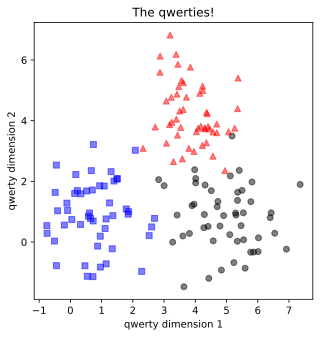

In [4]:
# Check that the function works

theData = createSomeData(50)

data = theData["data"]
labels = theData["labels"]

# show the data
fig = plt.figure(figsize=(5, 5))
plt.plot(
    data[np.where(labels == 0)[0], 0],
    data[np.where(labels == 0)[0], 1],
    "bs",
    alpha=0.5,
)
plt.plot(
    data[np.where(labels == 1)[0], 0],
    data[np.where(labels == 1)[0], 1],
    "ko",
    alpha=0.5,
)
plt.plot(
    data[np.where(labels == 2)[0], 0],
    data[np.where(labels == 2)[0], 1],
    "r^",
    alpha=0.5,
)
plt.title("The qwerties!")
plt.xlabel("qwerty dimension 1")
plt.ylabel("qwerty dimension 2")
plt.show()

In [6]:
# create a class for the model
def createTheQwertyNet(nUnits, nLayers):

    class qwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            # create dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers

            ### input layer
            self.layers["input"] = nn.Linear(2, nUnits)

            ### hidden layers
            for i in range(1, nLayers):
                self.layers[f"hidden{i}"] = nn.Linear(nUnits, nUnits)

            ### output layer
            self.layers["output"] = nn.Linear(nUnits, 3)

        # forward pass
        def forward(self, x):
            # input layer
            x = F.relu(self.layers["input"](x))

            # hidden layers
            for i in range(1, self.nLayers):
                x = F.relu(self.layers[f"hidden{i}"](x))

            # return output layer
            x = self.layers["output"](x)
            return x

    # create the model instance
    net = qwertyNet(nUnits, nLayers)

    # loss function
    lossfun = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

    return net, lossfun, optimizer

In [7]:
# test the model with fake input

nUnitsPerLayer = 12
nLayers = 4

net, lossf, opt = createTheQwertyNet(nUnitsPerLayer, nLayers)
print(net)

# input is ten samples
input = torch.rand(10, 2)
net(input)

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


tensor([[-0.2199,  0.1466, -0.0355],
        [-0.2227,  0.1463, -0.0383],
        [-0.2185,  0.1473, -0.0280],
        [-0.2194,  0.1473, -0.0306],
        [-0.2191,  0.1470, -0.0345],
        [-0.2227,  0.1463, -0.0385],
        [-0.2202,  0.1471, -0.0356],
        [-0.2180,  0.1473, -0.0265],
        [-0.2222,  0.1465, -0.0376],
        [-0.2193,  0.1473, -0.0300]], grad_fn=<AddmmBackward0>)